In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    sys.path.append(module_path+'/data')

In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from codes.preprocess import *

In [3]:
from codes.preprocess import *
X_train, y_train = load_clean_data('train')

In [4]:
categ_cols = X_train.columns[X_train.dtypes==object].tolist()
numeric_cols = X_train.columns[X_train.dtypes!=object].tolist()
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('categor', categorical_transformer, categ_cols)
    ]
)

In [5]:
pipe = Pipeline([
     ('prep', preprocessor),
     ('estm', RandomForestClassifier())
])

In [10]:

param_grid = dict(estm =[SVC(gamma = 'auto'), LogisticRegression(solver = 'lbfgs',max_iter =1000)],
                  estm__C=[0.1, 10, 100])

#distributions = dict(C=uniform(loc=0, scale=4))
logistic_reg = RandomizedSearchCV(pipe, param_grid, random_state=42)


pipe.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['id', 'org_balance',
                                                   'interest_rate', 'ltv',
                                              

In [ ]:
# Score, Interest rate, LTV, Loan Age, Original Unpaid balance, Debt-to-Income ratio.

In [11]:
X_train.head()

,id,org_balance,interest_rate,ltv,borrower_count,score,loan_purpose,dti,occupancy_type,property_type,upc_balance,loan_age,months_to_maturity,payment_amounts
0,348182948687,64000,5.250,47,2,728.0,C,30.0,I,SF,62412.40,12,348,163.49
1,762436040449,408000,4.250,80,2,750.5,P,33.0,P,SF,402288.47,10,350,580.28
2,996311929665,105000,4.250,75,1,809.0,R,29.0,P,PU,88885.01,16,164,1469.89
3,119104577800,388000,3.875,80,1,776.0,P,42.0,P,SF,376818.06,19,341,605.76
4,721657516998,179000,4.750,85,1,761.0,P,39.0,P,CO,175510.00,13,347,-0.00


In [15]:
from codes.preprocess import *
X_test, y_test = load_clean_data('test')

In [48]:
#Combine the train and test datasets
Final_df_X = pd.concat([X_train,X_test], ignore_index =True)

In [49]:
Final_df_Y = pd.concat([y_train,y_test], ignore_index =True)

In [68]:
Final_df=pd.concat([Final_df_X,Final_df_Y],axis=1)

Error in callback <function flush_figures at 0x1a257aa170> (for post_execute):


KeyboardInterrupt: 

In [116]:
 #(x ='score',y="delinquent_bool",data=X_test)
    
sns.set(style="white")
sns.set_palette('dark')

def ax_params(xlabel, ylabel, plt_title=None, ax=None, legend_title=None, c='k', savefig=False):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(plt_title)
    if legend_title:
        plt.legend(title=legend_title)
    if ax is None:
        ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color(c)
    ax.spines['bottom'].set_color(c)
    if savefig:
        plt.gcf().savefig(f'{plt_title}.png',bbox_inches='tight')
def distplot(column):
    sns.distplot(Final_df_X[column][Final_df_Y==0], color = '#1a9988', label='Current',  bins =10, kde =False, norm_hist =True)
    sns.distplot(Final_df_X[column][Final_df_Y==1], color= '#eb5600', label ='Delinquent', bins =10, kde =False, norm_hist =True)

In [ ]:
dist

In [127]:
Features = {'score':'Borrower Credit Score', 
            'interest_rate': 'Interest rate', 
            'ltv': 'Loan to Value',
            'loan_age': 'Loan Age',
            'dti': 'Debt to Income ratio',
            'upc_balance' : 'Unpaid balance amount',
            'loan_purpose': 'Loan purpose'
            }

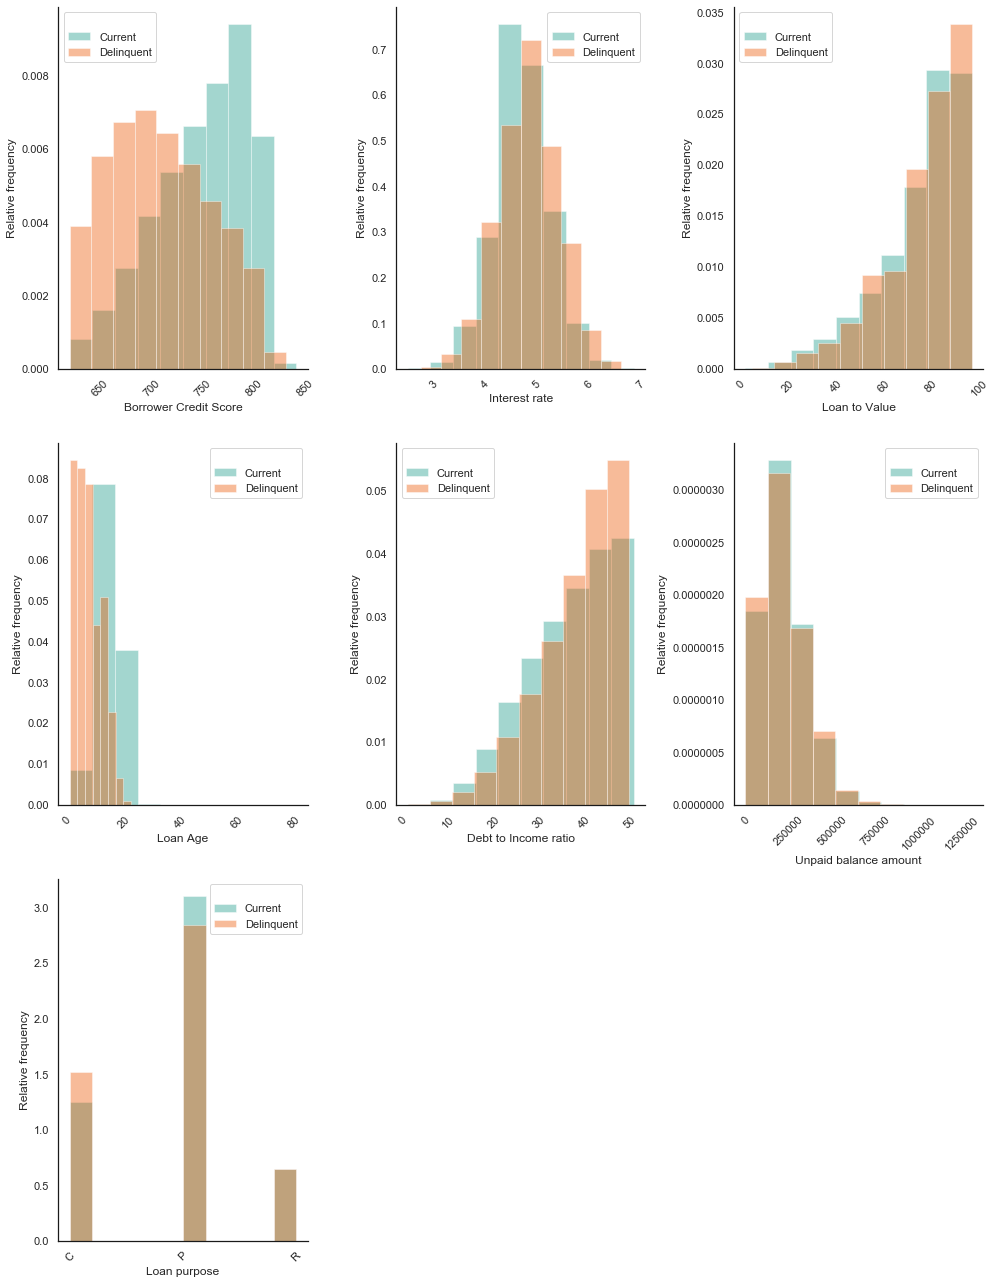

In [132]:
fig = plt.figure(figsize=(14,18))
axes = []
for i,col in enumerate(Features.keys()):
    ax = fig.add_subplot(3,3,i+1)
    distplot(col)
    ax_params(Features[col], 'Relative frequency', legend_title=" ")
plt.tight_layout()

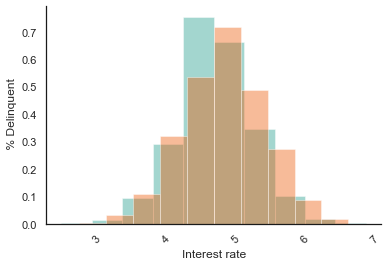

In [119]:
distplot('interest_rate')
ax_params('Interest rate', ' % Delinquent')

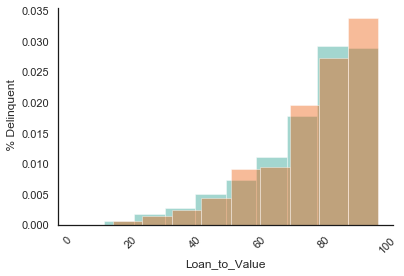

In [120]:
distplot('ltv')
ax_params('Loan_to_Value', ' % Delinquent')

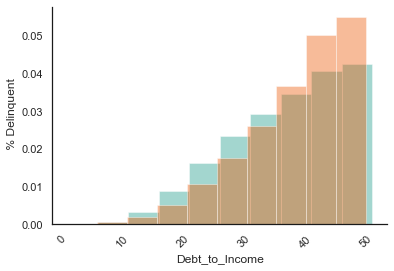

In [121]:
distplot('dti')
ax_params('Debt_to_Income', ' % Delinquent')


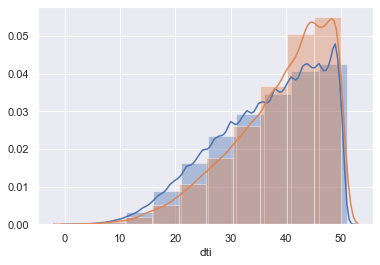

In [60]:
sns.set(style="darkgrid")

sns.distplot(Final_df_X.dti[Final_df_Y==0], bins =10, hist = True)
sns.distplot(Final_df_X.dti[Final_df_Y==1], bins =10)

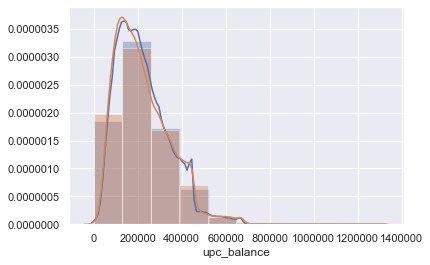

In [61]:
sns.set(style="darkgrid")

sns.distplot(Final_df_X.upc_balance[Final_df_Y==0], bins =10, hist = True)
sns.distplot(Final_df_X.upc_balance[Final_df_Y==1], bins =10)